# Applied Statistics

1.  For a given set of values in **stats.xls** that contains the list of employees, years of experience and their salary write a python script to calculate the mean, mode and median.
2.  For the above exercise determine the standard deviation and variance through python scripting. 

In [342]:
# Importing Libraries
import numpy as np
import pandas as pd
from scipy import stats

In [343]:
# Read the data and print the HEAD!
stats_df = pd.read_excel('Stats.xlsx')
stats_df.head()

,Emp#,YearsOfExp,Salary in Rs.
0,1.0,10.0,126015.0
1,2.0,1.0,12598.0
2,3.0,8.0,100639.0
3,4.0,10.0,125351.0
4,5.0,2.0,25031.0


In [344]:
stats_df.shape

(1048575, 3)

In [345]:
stats_df.isnull().sum()

Emp#             1048550
YearsOfExp       1048549
Salary in Rs.    1048550
dtype: int64

In [346]:
# Median for all the Columns
print(stats_df.median(skipna=True))

Emp#                13.0
YearsOfExp           6.6
Salary in Rs.    87654.0
dtype: float64


In [347]:
# Mean for all the Columns
print(stats_df.mean(skipna=True))

Emp#                13.0
YearsOfExp           6.2
Salary in Rs.    77821.2
dtype: float64


In [348]:
# Mode for the STATS DF
stats_df.mode(axis=0)[:1]

,Emp#,YearsOfExp,Salary in Rs.
0,1.0,10.0,100639.0


In [349]:
# Standard Deviation
print(stats_df.std())

Emp#                 7.359801
YearsOfExp           3.111270
Salary in Rs.    39847.615281
dtype: float64


In [350]:
# Variance
print(stats_df.var())

Emp#             5.416667e+01
YearsOfExp       9.680000e+00
Salary in Rs.    1.587832e+09
dtype: float64


# Natural Language Processing

1. Write a python script that reads the **data_in.csv** from every cell in column labeled as comment and perform sentence tokenization and redirects in to column of **data_out.csv**. Perform the NE Chunking on these sentences. 
2. Write a python script that reads the **data_in.csv** from every cell in column labeled as comment and perform word tokenization and redirects in to column of **data_out.csv**
3. From an input file **data.txt** it is required to identify the POS-Tagging and display it on tree structure.
4. For a given text file exclude the stop words and perform the Stemming & lemmatization and compare the results.
5. Create a small dictionary file with required set of words with weightage attached to it with positive and negative numbers. Create a python script that analyzes the given text file and classify it as negative or positive sentiment

### 1. Sentence Tokenization!

In [351]:
# Importing the Data Set
data_in = pd.read_excel('data_in.csv')
data_in.head()

,Comment
0,"""Hello there, how are you? Weather is awesome...."
1,"""Hello Mr. Raja, how are you? Weather is aweso..."
2,"""Hello Mr. Raja, how are you. Weather is bad. ..."
3,"""NLP is great technique. It is nice to learn t..."
4,"""AI is making difference in this world now. I..."


In [352]:
# Importing NLTK
from nltk.tokenize import sent_tokenize
new_list = []
# Looping so that it starts picking each entry/row
for i in data_in.Comment:
    sentence = sent_tokenize(i)
    print(sentence)
    new_list.append(sentence)


['"Hello there, how are you?', 'Weather is awesome.', 'Its raining here now."']
['"Hello Mr. Raja, how are you?', 'Weather is awesome.', 'Its raining here now."']
['"Hello Mr. Raja, how are you.', 'Weather is bad.', 'Its heavily raining here now."']
['"NLP is great technique.', 'It is nice to learn this technique."']
['"AI is making difference in this world now.', 'It would be helpful for betterment of human life.', 'We need to make advantage of that."']


In [353]:
new_df = pd.DataFrame(new_list,columns=['Tokenized_Column_1','Tokenized_Column_2','Tokenized_Column_3'])
new_df.head()

,Tokenized_Column_1,Tokenized_Column_2,Tokenized_Column_3
0,"""Hello there, how are you?",Weather is awesome.,"Its raining here now."""
1,"""Hello Mr. Raja, how are you?",Weather is awesome.,"Its raining here now."""
2,"""Hello Mr. Raja, how are you.",Weather is bad.,"Its heavily raining here now."""
3,"""NLP is great technique.","It is nice to learn this technique.""",None
4,"""AI is making difference in this world now.",It would be helpful for betterment of human life.,"We need to make advantage of that."""


In [354]:
# Since we get 3 columns, we intend to STACK them into one column!
new_df = pd.DataFrame(new_df.stack().reset_index(drop=True),columns = ['Tokenized Column'])
new_df

,Tokenized Column
0,"""Hello there, how are you?"
1,Weather is awesome.
2,"Its raining here now."""
3,"""Hello Mr. Raja, how are you?"
4,Weather is awesome.
5,"Its raining here now."""
6,"""Hello Mr. Raja, how are you."
7,Weather is bad.
8,"Its heavily raining here now."""
9,"""NLP is great technique."


In [355]:
# Now we willl push it out a new file    
new_df.to_csv('data_out.csv')

In [356]:
# Let's do NE Checking
from nltk.chunk import ne_chunk 
from nltk.tokenize import word_tokenize 
from nltk.tag import pos_tag
for i in new_df['Tokenized Column']:
    chunk_sentence = ne_chunk(pos_tag(word_tokenize(i))) 
    print (chunk_sentence)

(S ``/`` Hello/NNP there/RB ,/, how/WRB are/VBP you/PRP ?/.)
(S (GPE Weather/NNP) is/VBZ awesome/JJ ./.)
(S Its/PRP$ raining/VBG here/RB now/RB ./. ''/'')
(S
  ``/``
  (PERSON Hello/NNP Mr./NNP Raja/NNP)
  ,/,
  how/WRB
  are/VBP
  you/PRP
  ?/.)
(S (GPE Weather/NNP) is/VBZ awesome/JJ ./.)
(S Its/PRP$ raining/VBG here/RB now/RB ./. ''/'')
(S
  ``/``
  (PERSON Hello/NNP Mr./NNP Raja/NNP)
  ,/,
  how/WRB
  are/VBP
  you/PRP
  ./.)
(S (GPE Weather/NNP) is/VBZ bad/JJ ./.)
(S Its/PRP$ heavily/RB raining/VBG here/RB now/RB ./. ''/'')
(S ``/`` (ORGANIZATION NLP/NNP) is/VBZ great/JJ technique/NN ./.)
(S
  It/PRP
  is/VBZ
  nice/JJ
  to/TO
  learn/VB
  this/DT
  technique/NN
  ./.
  ''/'')
(S
  ``/``
  AI/NNP
  is/VBZ
  making/VBG
  difference/NN
  in/IN
  this/DT
  world/NN
  now/RB
  ./.)
(S
  It/PRP
  would/MD
  be/VB
  helpful/JJ
  for/IN
  betterment/NN
  of/IN
  human/JJ
  life/NN
  ./.)
(S
  We/PRP
  need/VBP
  to/TO
  make/VB
  advantage/NN
  of/IN
  that/DT
  ./.
  ''/'')


### 2. Word Tokenization

In [357]:
# Read the data for Tokenization!
data_word_token = pd.read_excel('data_in.csv')
data_word_token

,Comment
0,"""Hello there, how are you? Weather is awesome...."
1,"""Hello Mr. Raja, how are you? Weather is aweso..."
2,"""Hello Mr. Raja, how are you. Weather is bad. ..."
3,"""NLP is great technique. It is nice to learn t..."
4,"""AI is making difference in this world now. I..."


In [358]:
# Let's load the library for word Tokenization
from nltk.tokenize import word_tokenize
new_word_list=[]
for i in data_word_token.Comment:
    word_token = word_tokenize(i)
    print(word_token)
    new_word_list.append(word_token)

['``', 'Hello', 'there', ',', 'how', 'are', 'you', '?', 'Weather', 'is', 'awesome', '.', 'Its', 'raining', 'here', 'now', '.', "''"]
['``', 'Hello', 'Mr.', 'Raja', ',', 'how', 'are', 'you', '?', 'Weather', 'is', 'awesome', '.', 'Its', 'raining', 'here', 'now', '.', "''"]
['``', 'Hello', 'Mr.', 'Raja', ',', 'how', 'are', 'you', '.', 'Weather', 'is', 'bad', '.', 'Its', 'heavily', 'raining', 'here', 'now', '.', "''"]
['``', 'NLP', 'is', 'great', 'technique', '.', 'It', 'is', 'nice', 'to', 'learn', 'this', 'technique', '.', "''"]
['``', 'AI', 'is', 'making', 'difference', 'in', 'this', 'world', 'now', '.', 'It', 'would', 'be', 'helpful', 'for', 'betterment', 'of', 'human', 'life', '.', 'We', 'need', 'to', 'make', 'advantage', 'of', 'that', '.', "''"]


In [359]:
new_df_word = pd.DataFrame(new_word_list)
new_df_word.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,``,Hello,there,",",how,are,you,?,Weather,is,...,None,None,None,None,None,None,None,None,None,None
1,``,Hello,Mr.,Raja,",",how,are,you,?,Weather,...,None,None,None,None,None,None,None,None,None,None
2,``,Hello,Mr.,Raja,",",how,are,you,.,Weather,...,'',None,None,None,None,None,None,None,None,None
3,``,NLP,is,great,technique,.,It,is,nice,to,...,None,None,None,None,None,None,None,None,None,None
4,``,AI,is,making,difference,in,this,world,now,.,...,.,We,need,to,make,advantage,of,that,.,''


In [360]:
# Since some sentences are larger than other, hence we will not rename them and move the whole DF to excel
# Also, we will rename the out file as we have already the same for Sentence Tokenization
new_df_word.to_csv('data_out_word_token.csv')

### 3. POS Tagging and Tree Structure!

In [361]:
# For perfroming POS Tagging, we need to have word tokenized as initial requirement which we have done. The we will
# apply the POS Wording to each of the Word Toenized!

In [362]:
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [363]:
f = open('NLPdataEx3&4-data_in.txt','r')
x = f.readlines()
x

['Hello there, how are you? Weather is awesome. Its raining here now.\n',
 'Hello Mr. Raja, how are you? Weather is awesome. Its raining here now.\n',
 'Hello Mr. Raja, how are you. Weather is bad. Its heavily raining here now.\n',
 'NLP is great technique. It is nice to learn this technique.\n',
 'AI is making difference in this world now.  It would be helpful for betterment of human life. We need to make advantage of that.\n']

In [364]:
# Loop through the list to get each sentence.
for i in x:
    tree_chunk_POS = ne_chunk(pos_tag(word_tokenize(i)))
# Print for the chunk formed
print(tree_chunk_POS)

(S
  AI/NNP
  is/VBZ
  making/VBG
  difference/NN
  in/IN
  this/DT
  world/NN
  now/RB
  ./.
  It/PRP
  would/MD
  be/VB
  helpful/JJ
  for/IN
  betterment/NN
  of/IN
  human/JJ
  life/NN
  ./.
  We/PRP
  need/VBP
  to/TO
  make/VB
  advantage/NN
  of/IN
  that/DT
  ./.)


In [365]:
tree_chunk_POS.draw()

### 4. Excluding Stop words and perfrom Stemming and Lemmatization!

In A stop word is a commonly used word **(such as “the”, “a”, “an”, “in”**) that a search engine has been programmed to ignore.

In [366]:
# for excluding top words, we can pass the list. The output will be the normal sentence at first, then sentence with excluded words.
from nltk.corpus import stopwords
stop_words_excluding = set(stopwords.words('english'))
words_tokenized =[]
# We loop to read each line whihc is obtained in the list after reading the text file.
for i in x:
    for words in word_tokenize(i):
        if words not in stop_words_excluding:
            words_tokenized.append(words)

# Our original Sentences
for i in x:
    print(i)   

Hello there, how are you? Weather is awesome. Its raining here now.

Hello Mr. Raja, how are you? Weather is awesome. Its raining here now.

Hello Mr. Raja, how are you. Weather is bad. Its heavily raining here now.

NLP is great technique. It is nice to learn this technique.

AI is making difference in this world now.  It would be helpful for betterment of human life. We need to make advantage of that.



In [367]:
# Our List now excluding the stop words
print(words_tokenized)

['Hello', ',', '?', 'Weather', 'awesome', '.', 'Its', 'raining', '.', 'Hello', 'Mr.', 'Raja', ',', '?', 'Weather', 'awesome', '.', 'Its', 'raining', '.', 'Hello', 'Mr.', 'Raja', ',', '.', 'Weather', 'bad', '.', 'Its', 'heavily', 'raining', '.', 'NLP', 'great', 'technique', '.', 'It', 'nice', 'learn', 'technique', '.', 'AI', 'making', 'difference', 'world', '.', 'It', 'would', 'helpful', 'betterment', 'human', 'life', '.', 'We', 'need', 'make', 'advantage', '.']


Now we will perform **Stemming and Lemmatizing** on the transformed list!

In [368]:
# Stemming
from nltk.stem import SnowballStemmer
ps = SnowballStemmer('english')
all_small =[]
for words in words_tokenized:
    print(ps.stem(words))
    all_small.append(words)

hello
,
?
weather
awesom
.
it
rain
.
hello
mr.
raja
,
?
weather
awesom
.
it
rain
.
hello
mr.
raja
,
.
weather
bad
.
it
heavili
rain
.
nlp
great
techniqu
.
it
nice
learn
techniqu
.
ai
make
differ
world
.
it
would
help
better
human
life
.
we
need
make
advantag
.


In [369]:
# Lemmatizing:
from nltk import stem 
lemmatizer = stem.WordNetLemmatizer()
for words in words_tokenized:
    print(lemmatizer.lemmatize(words))

Hello
,
?
Weather
awesome
.
Its
raining
.
Hello
Mr.
Raja
,
?
Weather
awesome
.
Its
raining
.
Hello
Mr.
Raja
,
.
Weather
bad
.
Its
heavily
raining
.
NLP
great
technique
.
It
nice
learn
technique
.
AI
making
difference
world
.
It
would
helpful
betterment
human
life
.
We
need
make
advantage
.


So **Stemming** reduced words like **It's,helpful,betterment** to **it,hep,better**, that means it brought those letters to stem or root form.
**Lemmatizing** reduced the names.

### 5 . Positive/Negative feedback for the words in a python dictionary

In [370]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
feedback_dict = {}
with open('NLPdataEx5dict.txt','r') as text_file:
    data = text_file.read().split('\n')
    for i in data:
        print(i)


neg_words=["hate","hatred","annoyed","annoy","annoyingly","nasty"]
pos_words=["nice","excellent","good","wonderful","best","better","awesome","beautiful","beauty","beautifully","supreme"]



So we intend to read the text file and then compare all the lowered case words to the **Positive** and **Nagetive** words from text file and assign a score to each! Then store it in the dictionary.

**PLease Note: The words are compared to the words in TEXT FILE**

In [371]:
df = pd.read_csv('NLPdataEx5dict.txt',sep = '=',header=None).set_index(0)

In [372]:
df.reset_index(inplace=True)
#df.droplevel('level1',axis=1)

In [373]:
cols = ['Sentiment','Words']
df.columns = cols
#df.set_index('Sentiment',inplace=True)

In [374]:
df.head()

,Sentiment,Words
0,neg_words,"[""hate"",""hatred"",""annoyed"",""annoy"",""annoyingly..."
1,pos_words,"[""nice"",""excellent"",""good"",""wonderful"",""best"",..."


In [375]:
pos_words = 0
neg_words = 0
tokenized_sent = [word.lower() for word in words_tokenized]
for word in tokenized_sent:
        if word in df.Words[1]:
            pos_words = 1
            feedback_dict[word] = pos_words
        elif word in df.Words[0]:
            neg_words = 1
            feedback_dict[word] = neg_words
        else:
            feedback_dict[word] = 0

feedback_dict

{',': 1,
 '.': 0,
 '?': 0,
 'advantage': 0,
 'ai': 0,
 'awesome': 1,
 'bad': 0,
 'betterment': 0,
 'difference': 0,
 'great': 0,
 'heavily': 0,
 'hello': 0,
 'helpful': 0,
 'human': 0,
 'it': 0,
 'its': 0,
 'learn': 0,
 'life': 0,
 'make': 0,
 'making': 0,
 'mr.': 0,
 'need': 0,
 'nice': 1,
 'nlp': 0,
 'raining': 0,
 'raja': 0,
 'technique': 0,
 'we': 1,
 'weather': 0,
 'world': 0,
 'would': 0}

**Since in text file we donot have words like BAD/BETTERMENT, hence those words have been assigned score 0 and words such as AWESOME/NICE are in positive list, hence with 1.**
**It is strange to see that the words do not contain any negative word from the text file.**

# Machine Learning

## Write a python script  
BEST FIT LINE - Calling SKlearn linear regression 

Ex 1. Data: 
1. Download the MPG data file from UCI Machine Learning repository https://archive.ics.uci.edu/ml/machine-learningdatabases/auto-mpg/  
2. Identify target variable and independent variable. 
3. Prepare the data file 

## Univariate Regression 
Ex 2. Import relevant python libraries and sklearn linear_model  
Ex 3. Split the file into train [80%] and test [20%] data 
Ex 4. Apply linear regression  
Ex 5. Train the model using the training sets  
Ex 6. Display the coefficients coef, intercept and residues 
Ex 7.Predict using test data  
Ex 8. Perform Accuracy check using the R Square 
Ex 9. Display using scatter plot the data points and the best fit line

## Multi-variate Regression 

Repeat the above steps  BEST FIT LINE - Cost function using un-constrained method -  Gradient descent    
Ex 1. Use the downloaded data  
Ex 2. Convert this data to array  
Ex 3. Define the learning rate and no. of iterations as 0.0001 and 1000 respectively along with y-intercept and slope  
Ex 4. Create the functions to get the BEST FIT line  
1. Compute error for the line given the points 
2. Step gradient function 
3. Gradient descent 

Ex 5. Display using scatter plot the data points and the best fit line  
Ex 6. Display the Gradient and y-intercept value in the form y = mx+ c   
Ex 7. Find the BEST FIT line i.e., m and c of y=mx+c with least error using trial and error method i.e., modify learning rate or iterations or both 

In [376]:
# Univariate Regression:
auto_df = pd.read_csv('auto_mpg.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


We will be predicting the **Milage Per Gas**, hence we will be taking the **mpg** as our Target Vairable and **Weight** as our Predictor Variable!

In [377]:
# Now let's perform a Data Sanity check!
auto_df.shape

(398, 9)

In [378]:
auto_df.isnull().sum()
# we have a clean data frame!

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [379]:
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Looking at MPG by cylinders as we can see **with increase in CYLINDERS, MPG is decreasing**, which means **Expensive cars do have a lower mileage!**

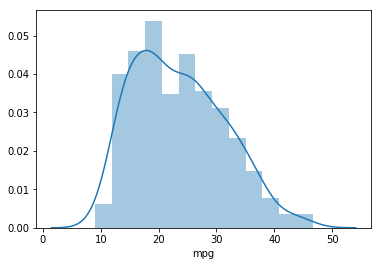

In [380]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(auto_df.mpg);
plt.show();

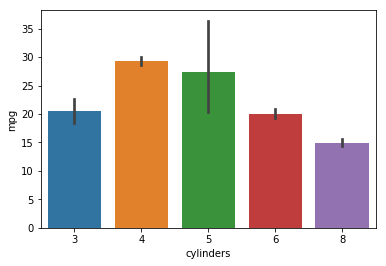

In [381]:
sns.barplot(x = 'cylinders',y = 'mpg',data = auto_df);
plt.show();

Let's have a look at the unique values for all the numerical variables:

In [382]:
def unique_values_for_variables(df):
    cols_df = df.select_dtypes(exclude=['object'])
    cols = list(cols_df.columns)
    for i in cols:
        print(i)
        print(cols_df[i].value_counts())
        print('------------------------------')

In [383]:
unique_values_for_variables(auto_df)

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
16.0    13
19.0    12
24.0    11
25.0    11
28.0    10
22.0    10
23.0    10
20.0     9
27.0     9
29.0     8
21.0     8
30.0     7
31.0     7
17.0     7
12.0     6
36.0     6
32.0     6
17.5     5
15.5     5
11.0     4
38.0     4
20.2     4
21.5     3
33.0     3
18.5     3
        ..
20.8     1
23.6     1
30.9     1
43.4     1
39.1     1
40.9     1
20.3     1
34.7     1
32.9     1
22.3     1
46.6     1
32.2     1
26.8     1
19.1     1
27.5     1
19.9     1
41.5     1
31.6     1
35.7     1
23.5     1
39.0     1
25.1     1
32.8     1
44.0     1
28.8     1
34.2     1
38.1     1
37.2     1
32.1     1
32.7     1
Name: mpg, Length: 129, dtype: int64
------------------------------
cylinders
4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64
------------------------------
displacement
97.0     21
98.0     18
350.0    18
250.0    17
318.0    17
140.0    16
400.0    13
225.0    13
91.0     12
232.0    11
121.0   

So only for **Origin** and **Cylinders** we have limited sophisticated values!
Let's take **X** and **Y** as our target and predictor variables!

We decide out **Target and Predictor Variable** based on Correlation Matrix. Since this is a Univariate Linear Regression, we will take the appropriate **least** correlated variables, as they are independent of each other!

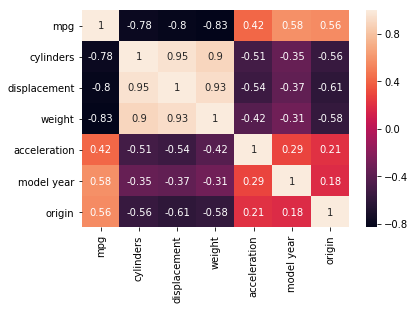

In [384]:
# Heat Map for showing the Correlation!
sns.heatmap(auto_df.corr(),annot=True);
plt.show();

In [385]:
data_we_need = auto_df.loc[:,['mpg','weight']]
data_we_need.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


In [386]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

In [387]:
# Let's normalize our data:
data_we_need = data_we_need.apply(zscore)
data_we_need.head()

,mpg,weight
0,-0.706439,0.630870
1,-1.090751,0.854333
2,-0.706439,0.550470
3,-0.962647,0.546923
4,-0.834543,0.565841


In [388]:
# Awesome, we converted our data set, now let's get X and Y and split it in 80% -- 20% ratio
# We need to reshape in order to feed to Learning Algorithm!
X = np.array(data_we_need['weight']).reshape(-1, 1) 
Y = np.array(data_we_need['mpg']).reshape(-1, 1) 

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

**So what we re trying to achieve is that based on Weight, we are trying to obtain the MPG!**

In [389]:
X.shape

(398, 1)

In [390]:
Y.shape

(398, 1)

In [391]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [392]:
# Let's check Accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt

In [393]:
# Making Predictions!
y_predict = lr.predict(X_test)

In [394]:
# Residues!
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predict))
rmse
# So our RMSE is appropriate!

0.5195708256247643

In [395]:
# Let's pring the R2 Score! 
print(r2_score(y_test,y_predict))

0.740771824077


So a **74% accuracy** is obtained which is not a bad score!

In [396]:
print(lr.coef_)
print(lr.intercept_)

[[-0.82116861]]
[ 0.00089386]


In [397]:
# Now we will plot the Scatter Plot!

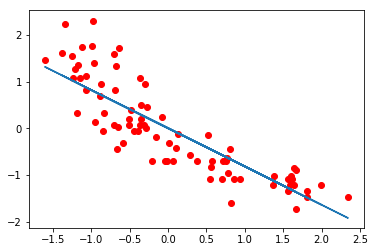

In [398]:
plt.scatter(X_test,y_test,color='r');
plt.plot(X_test,y_predict)
plt.show();

So we see that we get the best fit with **R2 Score as 74%**

### Multivariate Regression! with Gradient Descent!

In [399]:
# We use the same Auto MPG data!
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [400]:
# Data Sanity Check
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [401]:
auto_df.shape

(398, 9)

In [402]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [403]:
auto_df.replace('?',np.NaN)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [404]:
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


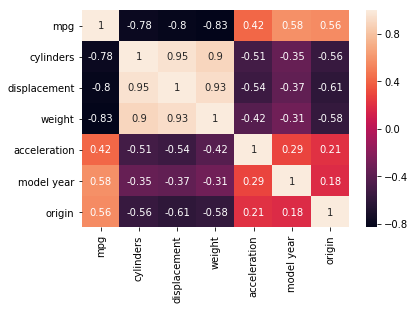

In [405]:
# Let's look at the correlation
sns.heatmap(auto_df.corr(),annot=True);
plt.show();

In [406]:
# We need to generally drop the high correlated variables for a Machine Learning model to be built!
# We will build a model with dropped variables and one without dropped variables.
## First without dropped variables!

In [407]:
# Let's encode the categorical variable
auto_df['car name'].value_counts()

ford pinto                           6
amc matador                          5
toyota corolla                       5
ford maverick                        5
toyota corona                        4
chevrolet impala                     4
amc gremlin                          4
chevrolet chevette                   4
peugeot 504                          4
amc hornet                           4
honda civic                          3
ford galaxie 500                     3
plymouth duster                      3
chevrolet citation                   3
volkswagen dasher                    3
chevrolet vega                       3
chevrolet caprice classic            3
chevrolet nova                       3
dodge colt                           3
pontiac catalina                     3
plymouth fury iii                    3
ford gran torino                     3
chevrolet chevelle malibu classic    2
buick skylark                        2
chevrolet monte carlo landau         2
toyota mark ii           

In [408]:
# We have 305 such unique variable names, so we will standard encode as if needed, model will keep it or else it will remove that feature!
auto_df['car name'] = auto_df['car name'].astype('category')
auto_df['car name'] = auto_df['car name'].cat.codes

In [409]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,49
1,15.0,8,350.0,165,3693,11.5,70,1,36
2,18.0,8,318.0,150,3436,11.0,70,1,231
3,16.0,8,304.0,150,3433,12.0,70,1,14
4,17.0,8,302.0,140,3449,10.5,70,1,161


In [410]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name          int16
dtype: object

In [411]:
data_without_question_mark = auto_df[auto_df.horsepower != '?']

In [412]:
data_without_question_mark.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name          int16
dtype: object

In [413]:
data_without_question_mark.horsepower = data_without_question_mark.horsepower.astype('float')

In [414]:
# Now we will scale
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [415]:
data_to_scale = data_without_question_mark.copy()

In [416]:
data_to_scale ['displacement'] = scale(data_to_scale['displacement'])
data_to_scale['horsepower'] = scale(data_to_scale['horsepower'])
data_to_scale ['acceleration'] = scale(data_to_scale['acceleration'])
data_to_scale ['weight'] = scale(data_to_scale['weight'])
data_to_scale['mpg'] = scale(data_to_scale['mpg'])

In [417]:
X = data_to_scale.drop(['mpg'],axis=1)
Y = data_to_scale.mpg

In [418]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [419]:
predictions = lr.predict(X_test)

In [420]:
score_we_achieved = r2_score(y_test,predictions)
print(score_we_achieved)

0.836868127064


**Wow! We got an 83% Test Accuracy!**

In [421]:
# RMSE Score!
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=predictions))
rmse

0.08468777087422807

# What we did above is a FUN Exercise!, Now let's do what is asked!
Sorry for this, but i had to do it for exploration!

In [422]:
data_we_need = data_without_question_mark.loc[:,['mpg','displacement']]

In [423]:
data_we_need = data_we_need.apply(zscore)

In [424]:
def compute_MSE(points,m,c):
    totalerr = 0
    for i in range(0,len(points)):
        x = points[i,1]
        y = points[i,0]
        totalerr +=(y - (m*x + c))**2
    return (totalerr/float(len(points)))

In [425]:
def step_gradient(points,m_curr,c_curr,learning_rate):
    m_grad=0
    c_grad =0
    n = float(len(points))
    for i in range(0,len(points)):
        x = points[i,1] 
        y = points[i,0]
        m_grad += -(2/n) * (y - (m_curr * x + c_curr)) * x
        c_grad += -(2/n) * (y - (m_curr * x + c_curr))
    m_new = m_curr - (learning_rate * m_grad)
    c_new = c_curr - (learning_rate * c_grad)  
              
    return(m_new,c_new)

In [426]:
def iteration(points,m,c, lrnrt,iteration_num):
    
    for i in range(iteration_num):
        m,c = step_gradient(points,m,c,lrnrt)
    
    return(m,c)

In [427]:
points=np.array(data_we_need)

In [428]:
points[0,0]

-0.69863840869521487

In [429]:
##Initialize the hyper parameters
m_ini =0
c_ini = 0
iterations = 1000
learning_rt = 0.0001 

In [430]:
##call MSE
print('Starting gradient descent at m = {0}, c={1} with MSE = {2}'.format(m_ini,c_ini,compute_MSE(points,m_ini,c_ini)))

Starting gradient descent at m = 0, c=0 with MSE = 0.9999999999999994


In [431]:
[m,c]=iteration(points,m_ini,c_ini, learning_rt,iterations)

In [432]:
print(m,c)

-0.145957940577 2.60865981594e-17


In [433]:
##MPG = -0.145957940577 * Acceleration  -1.85832252364e-18

print('After {0} iterations, m = {1}, c={2} and MSE ={3}'.format(iterations,m,c,compute_MSE(points,m,c)))

After 1000 iterations, m = -0.14595794057686864, c=2.608659815939161e-17 and MSE =0.7862743783278395


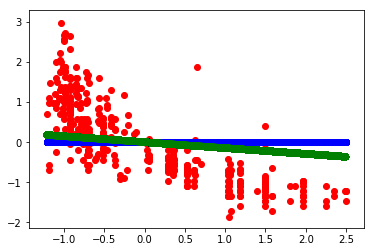

In [434]:
#plot
for i in range(0,len(points)):
        x = points[i,1] 
        y = points[i,0]
        plt.scatter(x,y,color='red')
        
        plt.plot(data_we_need.displacement,(0*data_we_need.displacement + 0),color='blue',linewidth=7)
        plt.plot(data_we_need.displacement,(-0.14595794057686862*data_we_need.displacement + -1.858322523640159e-18),color='g',linewidth=7)
        
plt.show();

In [435]:
iterations = 2000
[m,c]=iteration(points,m_ini,c_ini, learning_rt,iterations)

In [436]:
print('After {0} iterations, m = {1}, c={2} and MSE ={3}'.format(iterations,m,c,compute_MSE(points,m,c)))

After 2000 iterations, m = -0.2654558048831789, c=4.696208699694883e-17 and MSE =0.6430155410018545


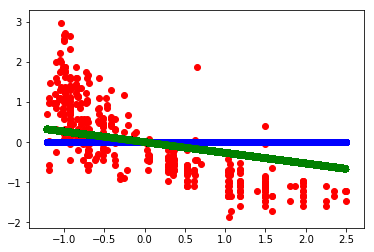

In [437]:
# Now we will do hit and trial method!
#plot
for i in range(0,len(points)):
        x = points[i,1] 
        y = points[i,0]
        plt.scatter(x,y,color='red')
        
        plt.plot(data_we_need.displacement,(0*data_we_need.displacement + 0),color='blue',linewidth=7)
        plt.plot(data_we_need.displacement,(-0.2654558048831788*data_we_need.displacement + -1.9971004017183067e-18),color='g',linewidth=7)
        
plt.show();

No such improvement in Fit Line, now we will try to improve the **Learning Rate** in order to get a better Line!

In [438]:
iterations = 2000
# Let us increase the learning rate
learning_rt = 0.01
[m,c]=iteration(points,m_ini,c_ini, learning_rt,iterations)

In [439]:
print('After {0} iterations, m = {1}, c={2} and MSE ={3}'.format(iterations,m,c,compute_MSE(points,m,c)))

After 2000 iterations, m = -0.8051269467104551, c=1.6613880410298645e-16 and MSE =0.3517705996806957


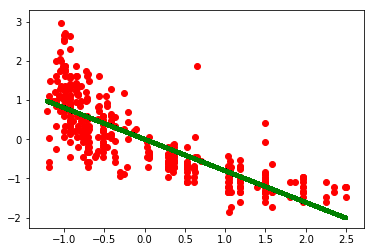

In [440]:
# Now we will do hit and trial method!
#plot
for i in range(0,len(points)):
        x = points[i,1] 
        y = points[i,0]
        plt.scatter(x,y,color='red')
        
        #plt.plot(data_we_need.displacement,(0*data_we_need.displacement + 0),color='blue',linewidth=7)
        plt.plot(data_we_need.displacement,(-0.8051269467104553*data_we_need.displacement + 5.4765220136587844e-17),color='g',linewidth=4)
        
plt.show();

**Oh Wow! Just increasing the Learning Rate, we achieved a Better Fit Line!** Cool!

In [441]:
iterations = 1000
# Let us increase the learning rate
learning_rt = 0.001
[m,c]=iteration(points,m_ini,c_ini, learning_rt,iterations)

In [442]:
print('After {0} iterations, m = {1}, c={2} and MSE ={3}'.format(iterations,m,c,compute_MSE(points,m,c)))

After 1000 iterations, m = -0.6963828601440525, c=1.0199870462135343e-16 and MSE =0.36359587604385735


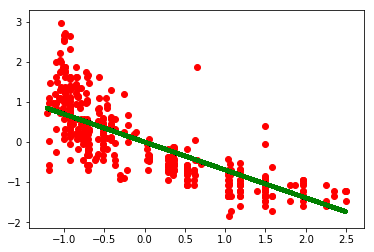

In [443]:
# Now we will do hit and trial method!
#plot
for i in range(0,len(points)):
        x = points[i,1] 
        y = points[i,0]
        plt.scatter(x,y,color='red')
        
        #plt.plot(data_we_need.displacement,(0*data_we_need.displacement + 0),color='blue',linewidth=7)
        plt.plot(data_we_need.displacement,(-0.6963828601440525*data_we_need.displacement -1.0512857945288447e-17),color='g',linewidth=4)
        
plt.show();

So we say that with **Learning Rate of 0.01 and Iterations of 2000** gave us a error of 35% and that is acceptable for the mean time!

# KNN Machine Learning Model!

Ex 1. Data: 
    1. Download the census data file from UCI Machine Learning repository http://archive.ics.uci.edu/ml/machine-learningdatabases/haberman/  
    2. Identify target variable and independent variable. 
    3. Prepare the data file  
Ex 2. Import relevant python libraries and sklearn KNN model  
Ex 3. Split the file into train [80%] and test [20%] data  
Ex 4.  Apply KNN algorithm  
Ex 5. Train the model using the training set  
Ex 6. Predict using test data   
Ex 7. Perform Accuracy check 

In [444]:
df_haberman = pd.read_table('haberman.data',names=['age','year_of_operation','positive_ve_auxillary_nodes','survival'],sep=',')
df_haberman.head()

,age,year_of_operation,positive_ve_auxillary_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


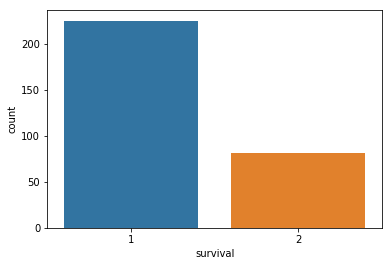

In [445]:
# Now let's see the Positive Auxilliary nodes based on Survival
sns.countplot(df_haberman.survival);
plt.show();

So we see that larger number of patients have survived longer than 5 years! **What is their count?**

In [446]:
df_haberman.dtypes

age                            int64
year_of_operation              int64
positive_ve_auxillary_nodes    int64
survival                       int64
dtype: object

In [447]:
df_survived = df_haberman.groupby('survival').get_group(1)
df_did_not_survived = df_haberman.groupby('survival').get_group(2)
df_survived.head()

,age,year_of_operation,positive_ve_auxillary_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


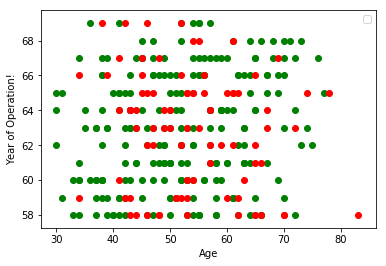

In [448]:
import warnings
warnings.filterwarnings('ignore')
plt.scatter(x = df_haberman.age[df_haberman.survival==1],y = df_haberman.year_of_operation[df_haberman.survival==1],c = 'green')
plt.scatter(x = df_haberman.age[df_haberman.survival ==2],y = df_haberman.year_of_operation[df_haberman.survival==2],c = 'red')
plt.legend('Survived more than 5 years','Could not survived more than 5 years!')
plt.xlabel('Age');
plt.ylabel('Year of Operation!');
plt.show();

In [449]:
print('Number of People Survived: ',len(df_survived))

Number of People Survived:  225


In [450]:
print('Number of People did not Survived: ',len(df_did_not_survived))

Number of People did not Survived:  81


In [451]:
print('Rows in our Data Frame: ',df_haberman.shape[0])

Rows in our Data Frame:  306


#### So our OBJECTIVE is to cluster these Survived and Not Survived using the KNN Algorithm and check out the final results!

In [452]:
# Although it looks like that the class of Survival is imbalanced but we have 75% of data for Survival, we have seen that in credit card transaction, we can face a class imbalance of 2% interms of Non Defaultees.
# Hence here we do not need to rebalance the target class
X = df_haberman.drop(['survival'],axis=1)
y = df_haberman.survival

# Let us split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [453]:
# Scaling the variables!
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [454]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

clr = KNeighborsClassifier(n_neighbors = 2,metric = 'euclidean',p=1)
clr.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=2, p=1,
           weights='uniform')

In [455]:
# Time to make predictions
y_pred = clr.predict(X_test)

In [456]:
# Check Accuracy
accuracy_score(y_test,y_pred)

0.64516129032258063

In [457]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[35,  2],
       [20,  5]])

In [458]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.64      0.95      0.76        37
          2       0.71      0.20      0.31        25

avg / total       0.67      0.65      0.58        62



What if we scale or data using zscore

In [459]:
scale = df_haberman.apply(zscore)
scale.head()

,age,year_of_operation,positive_ve_auxillary_nodes,survival
0,-2.082140,0.353584,-0.421592,-0.6
1,-2.082140,-0.262921,-0.142959,-0.6
2,-2.082140,0.661837,-0.560909,-0.6
3,-1.989426,-1.187680,-0.282275,-0.6
4,-1.989426,0.661837,-0.003642,-0.6


In [460]:
X = df_haberman.drop(['survival'],axis=1)
y = df_haberman.survival

# Let us split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [461]:
clr = KNeighborsClassifier(n_neighbors = 2,metric = 'euclidean',p=1)
clr.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=2, p=1,
           weights='uniform')

In [462]:
# Time to make predictions
y_pred = clr.predict(X_test)

In [463]:
accuracy_score(y_test,y_pred)

0.61290322580645162

In [464]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.61      0.95      0.74        37
          2       0.60      0.12      0.20        25

avg / total       0.61      0.61      0.53        62



So we saw that with the same dataset but two different scaling methods, we get a better score in predictions for **StandardScaler()**. Although our Accuracy is 64% only, but the reasons could be low sample data, or less number of features to attain for!

# Thank You!